# Imports

In [46]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [47]:
n = 7 # 5~9
label_name = "stat3" # update stat number
layers = [5, 2] # mess with the layers (last layer should be the number of possibilities for this stat)

epochs = 3000 # increase if the loss is still decreasing by the end of training
train_split, test_split = 0.8, 0.2
learning_rate = 0.005 # don't change probably
momentum = 0.9 # don't change probably
batch_size = 64 # higher acc and longer runtime if smaller

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [48]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [49]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 43.683090567588806
Epoch 1, Loss 41.95118635892868
Epoch 2, Loss 40.16156941652298
Epoch 3, Loss 38.016286224126816
Epoch 4, Loss 36.040914714336395
Epoch 5, Loss 34.5971220433712
Epoch 6, Loss 33.798037618398666
Epoch 7, Loss 33.88356477022171
Epoch 8, Loss 33.27768498659134
Epoch 9, Loss 32.936923801898956
Epoch 10, Loss 32.24942222237587
Epoch 11, Loss 31.669408798217773
Epoch 12, Loss 30.62507177889347
Epoch 13, Loss 29.90411227941513
Epoch 14, Loss 28.560756132006645
Epoch 15, Loss 27.702418729662895
Epoch 16, Loss 26.11555328965187
Epoch 17, Loss 24.539263978600502
Epoch 18, Loss 23.01086401939392
Epoch 19, Loss 21.700489029288292
Epoch 20, Loss 20.581641390919685
Epoch 21, Loss 19.369191482663155
Epoch 22, Loss 17.549331158399582
Epoch 23, Loss 16.393257081508636
Epoch 24, Loss 15.10911713540554
Epoch 25, Loss 13.992621824145317
Epoch 26, Loss 13.3512819185853
Epoch 27, Loss 12.41619648784399
Epoch 28, Loss 11.772181242704391
Epoch 29, Loss 11.169844880700111
Epoch

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

C:\Users\lewil\AppData\Local\Temp\ipykernel_36132\2152728193.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


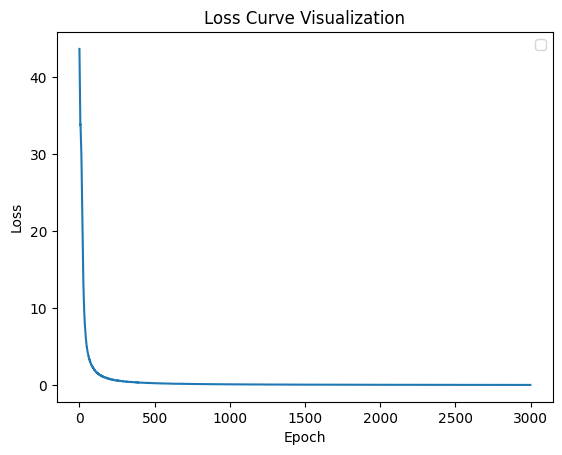

In [50]:
# plot loss vs epoch
plt.plot([i for i in range(epochs)], losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Loss Curve Visualization')
plt.legend()
plt.savefig(f'figures/loss_curve_{label_name}_{n}.png')

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

[[964, 0], [0, 44]]


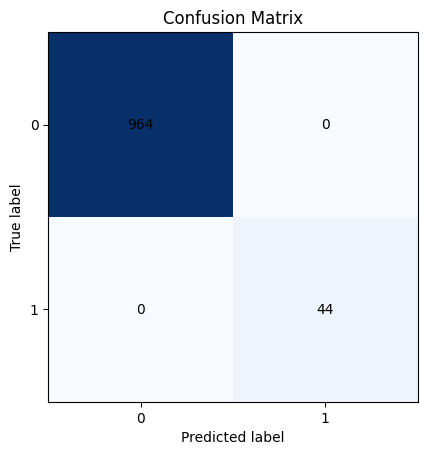

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 100.0%
Overall accuracy = 100.0%


In [51]:
confusion_matrix = evaluate_model(model, test_dataset) # try training_dataset and test_dataset

print(confusion_matrix)
confusion_matrix.plot()
confusion_matrix.print_accuracy()

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

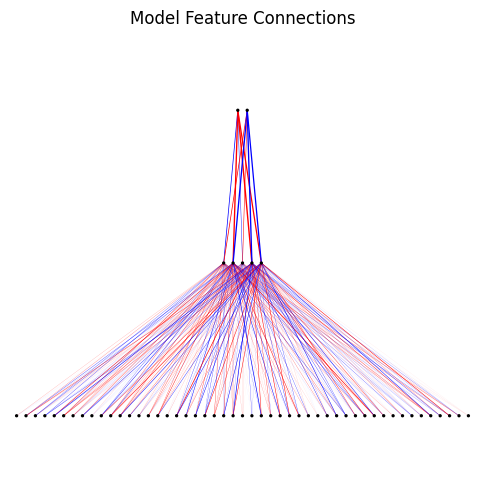

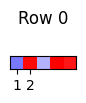

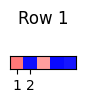

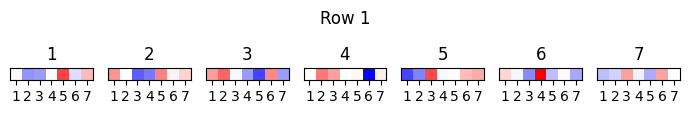

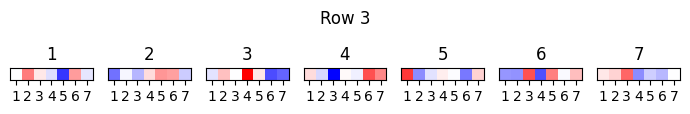

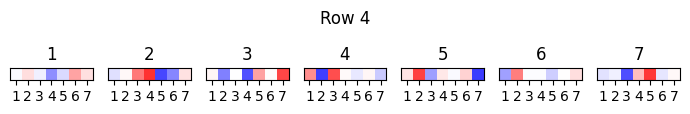

In [56]:
model.plot_connections()

#model.plot_heatmap_feature(0, 0)
#model.plot_heatmap_feature(0, 1)

#model.plot_heatmap_feature(2, 0)
#model.plot_heatmap_feature(2, 1)

model.plot_heatmap_feature(1, 0)
model.plot_heatmap_feature(1, 1)

#model.plot_heatmap_feature(0, 0)
model.plot_heatmap_feature(0, 1)
#model.plot_heatmap_feature(0, 2)
model.plot_heatmap_feature(0, 3)
model.plot_heatmap_feature(0, 4)
